In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/40400404/404.jpg
/kaggle/input/dataset/download.jfif
/kaggle/input/dataset/378.jpg
/kaggle/input/gvcgvhbh/download.jfif
/kaggle/input/abcdefg/plant_identification_model2.h5
/kaggle/input/abcdfgh/400.jpg
/kaggle/input/abcdfgh/MK-S-004.jpg
/kaggle/input/bgcvcvcvc/MK-S-004.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-042.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-053.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-051.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-047.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-044.jpg
/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Murraya Koenigii (Curry)/MK-S-013.jpg
/kaggle/input/s

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.image as mpimg
import math
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [3]:
import numpy as np
main_data = '/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images'

In [4]:
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data)))}
label_mapping

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)',
 26: 'Syzygium Cumini (Jamun)',
 27: 'Syzygium Jambos (Rose Apple)',
 28: 

1/1 [==============================] - 1s 1s/step


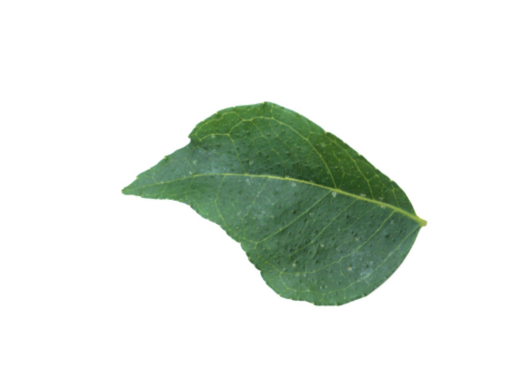

Top 1 Prediction: Murraya Koenigii (Curry), Confidence: 1.00
Top 2 Prediction: Santalum Album (Sandalwood), Confidence: 0.00
Top 3 Prediction: Azadirachta Indica (Neem), Confidence: 0.00


In [5]:

def display_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# Load the trained model
model = tf.keras.models.load_model('/kaggle/input/abcdefg/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    top_n = 3  # Number of top predictions to return
    top_indices = np.argsort(predictions[0])[::-1][:top_n]
    top_labels = [label_mapping[i] for i in top_indices]
    top_confidences = [predictions[0][i] for i in top_indices]

    return top_labels, top_confidences

# Provide the path to the image you want to classify
image_path = '/kaggle/input/40400404/404.jpg'  # Replace with your image path
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data)))} # Replace with your label mapping

# Get top 3 predictions
top_labels, top_confidences = predict_plant(image_path, label_mapping)

# Display the image
display_image(image_path)

# Print the top 3 predictions
for i, (label, confidence) in enumerate(zip(top_labels, top_confidences)):
    print(f"Top {i + 1} Prediction: {label}, Confidence: {confidence:.2f}")
